In [7]:
import pandas as pd

df = pd.read_csv('wdbc.data.csv', header = None)

In [8]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
df.iloc[:10,:]

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [10]:
len(df[0].unique())

569

In [11]:
len(df)

569

In [12]:
# Split into X and Y

X = df.iloc[:,2:]
Y = df.iloc[:,1]

In [78]:
# Create an instance of kNN and use it

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

clf = KNeighborsClassifier(n_neighbors=3)
scores = cross_val_score(clf,X,Y,cv=5)
print(scores)

[0.87826087 0.92173913 0.94690265 0.9380531  0.91150442]


In [79]:
# scale features to get rid of artifically large distances

from sklearn.preprocessing import scale

X_scaled = scale(X)
scores = cross_val_score(clf,X_scaled,Y,cv=5)
scores.mean()

0.9577683724509427

# This is how the standard scalar works (using "transformer" interface)

from sklearn.preprocessing import StandardScalar

scalar = StandardScalar()
X_scaled = scalar.fit(X).transform(X)

In [81]:
splitpoint = int(len(Y) * 0.8)
train_x = X.iloc[:splitpoint,:]
train_y = Y.iloc[:splitpoint]
test_x = X.iloc[splitpoint:,:]
test_y = Y.iloc[splitpoint:]

In [82]:
from sklearn.metrics import accuracy_score, confusion_matrix

clf.fit(train_x, train_y)
hyp = clf.predict(test_x)
print('Accuracy:', accuracy_score(test_y, hyp))
print('Confusion Matrix:\n', confusion_matrix(test_y, hyp))

Accuracy: 0.9298245614035088
Confusion Matrix:
 [[81  7]
 [ 1 25]]


In [83]:
tp = 0
tn = 0
fp = 0
fn = 0
total = 0
for h, l in zip(hyp, test_y):
    total += 1
    if h == l and h =='M':
        tp += 1
    elif h != l and h == 'M':
        fp += 1
    elif h == l and h == 'B':
        tn += 1
    else:
        fn += 1
print('Correctly classified as malignant:', tp)
print('Correctly classified as benign:', tn)
print('Incorrectly classified as malignant:', fp)
print('Incorrectly classified as benign:', fn)

precision = tp / (tp + fp)
recall = tp / (tp + fn)

f1 = (2 * precision * recall) / (precision + recall)

print("F1:",f1)

Correctly classified as malignant: 25
Correctly classified as benign: 81
Incorrectly classified as malignant: 7
Incorrectly classified as benign: 1
F1: 0.8620689655172413


In [84]:
def convert_y(old_y):
    import numpy as np
    conv = []
    for y in old_y:
        if y == 'B':
            conv.append(0)
        else:
            conv.append(1)
    return np.array(conv)

In [85]:
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
test_y_conv = convert_y(test_y)
hypo_y_conv = convert_y(hyp)
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(test_y_conv, hypo_y_conv, pos_label = 1)
    roc_auc[i] = auc(fpr[i], tpr[i])

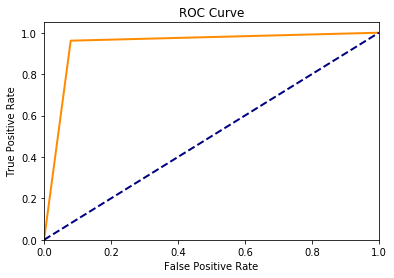

In [86]:
# Plot ROC for the above
import matplotlib.pyplot as plt

plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], color = 'darkorange', lw = lw)
plt.plot([0,1], [0,1], color = 'navy', lw = lw, linestyle = '--')
plt.title('ROC Curve')
plt.xlim(0.0,1.0)
plt.ylim(0.0,1.05)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()